In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('OttomanTest.csv')

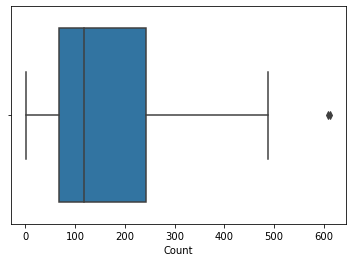

In [2]:
sns.boxplot(df['Count'])

In [4]:
max(df['Count'].mode())*1.36

341.36

In [5]:
train=df[:43]
test=df[43:55]
end=df[55:]

In [7]:
end

,ID,Datetime,Count
55,55,1-8-2020,NaN
56,56,1-9-2020,NaN
57,57,1-10-2020,NaN
58,58,1-11-2020,NaN
59,59,1-12-2020,NaN
60,60,1-1-2021,NaN
61,61,1-2-2021,NaN
62,62,1-3-2021,NaN


In [12]:
test.fillna((max(df['Count'].mode())*1.36),inplace=True)

In [13]:
test

,ID,Datetime,Count
43,43,1-8-2019,239.0
44,44,1-9-2019,235.0
45,45,1-10-2019,230.0
46,46,1-11-2019,609.0
47,47,1-12-2019,275.0
48,48,1-1-2020,382.0
49,49,1-2-2020,375.0
50,50,1-3-2020,1.0
51,51,1-4-2020,306.0
52,52,1-5-2020,247.0


In [14]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y') 
df.index = df.Timestamp 
df = df.resample('M').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y') 
train.index = train.Timestamp 
train = train.resample('M').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y') 
test.index = test.Timestamp 
test = test.resample('M').mean()
end.Timestamp = pd.to_datetime(end.Datetime,format='%d-%m-%Y') 
end.index = end.Timestamp 
end = end.resample('M').mean()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://

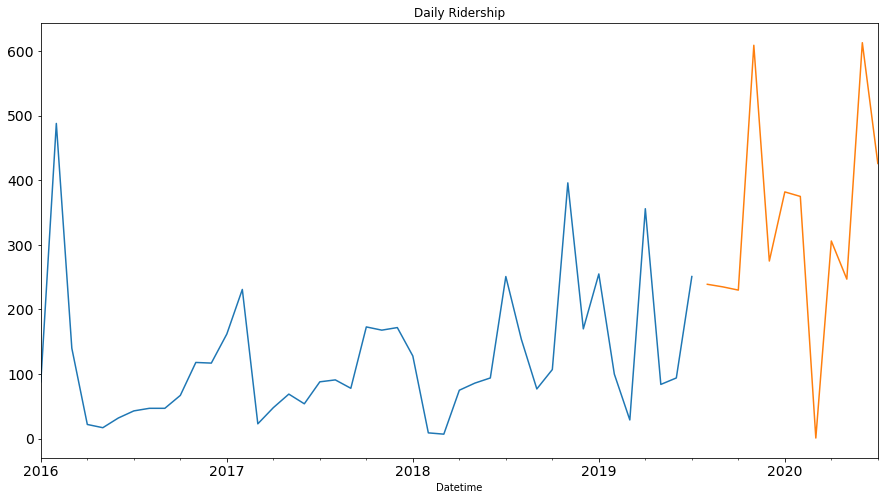

In [15]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing

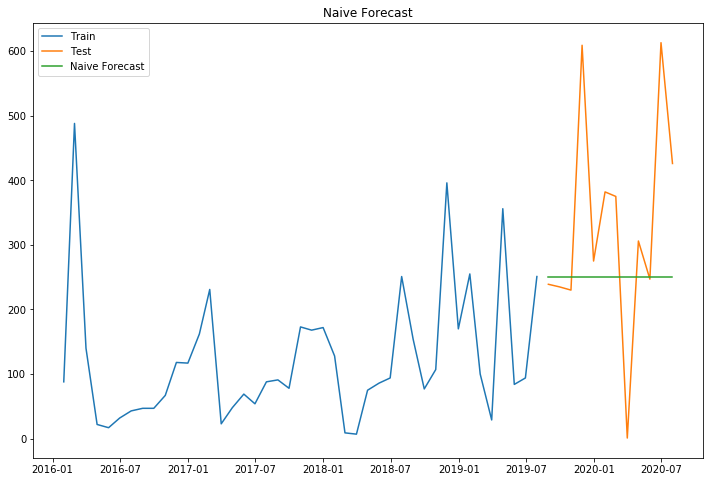

In [17]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

180.12218075517518


In [19]:
dd= np.asarray(train.Count)
y_end = end.copy()
y_end['naive'] = dd[len(dd)-1]

In [20]:
y_end

,ID,Count,naive
Datetime,,,
2020-08-31,55,NaN,251.0
2020-09-30,56,NaN,251.0
2020-10-31,57,NaN,251.0
2020-11-30,58,NaN,251.0
2020-12-31,59,NaN,251.0
2021-01-31,60,NaN,251.0
2021-02-28,61,NaN,251.0
2021-03-31,62,NaN,251.0


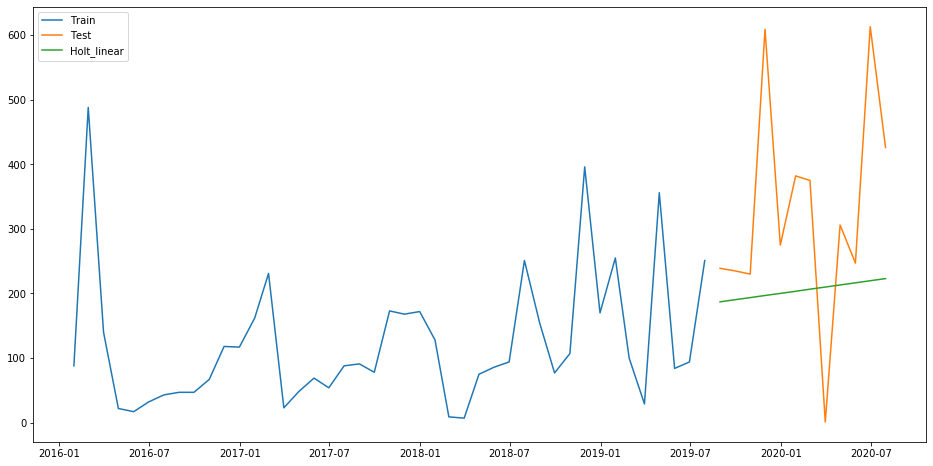

In [27]:
y_hat_avg = test.copy()
 
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
 
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [28]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print(rms)

202.22552869005975


In [29]:
y_end_avg = end.copy()
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_end_avg['Holt_linear'] = fit1.forecast(len(end))

In [30]:
y_end_avg['Holt_linear']

Datetime
2020-08-31    187.068728
2020-09-30    190.336849
2020-10-31    193.604970
2020-11-30    196.873091
2020-12-31    200.141212
2021-01-31    203.409334
2021-02-28    206.677455
2021-03-31    209.945576
Freq: M, Name: Holt_linear, dtype: float64

In [33]:
#Holt_Winter

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


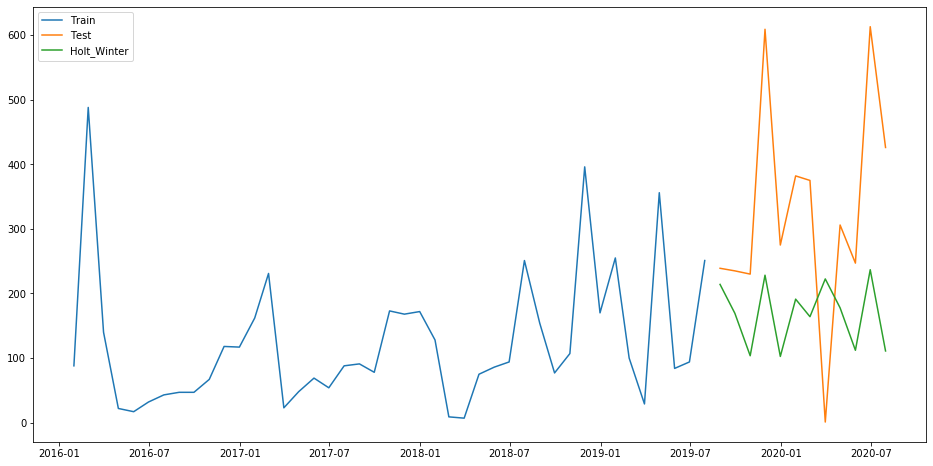

In [31]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [32]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

223.7819348695191


In [34]:
y_end_avg = end.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_end_avg['Holt_Winter'] = fit1.forecast(len(end))

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [35]:
y_end_avg['Holt_Winter'] 

Datetime
2020-08-31    214.051664
2020-09-30    169.287415
2020-10-31    103.606366
2020-11-30    228.306393
2020-12-31    102.533174
2021-01-31    191.224387
2021-02-28    164.086816
2021-03-31    222.533531
Freq: M, Name: Holt_Winter, dtype: float64

In [36]:
#ARIMA

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


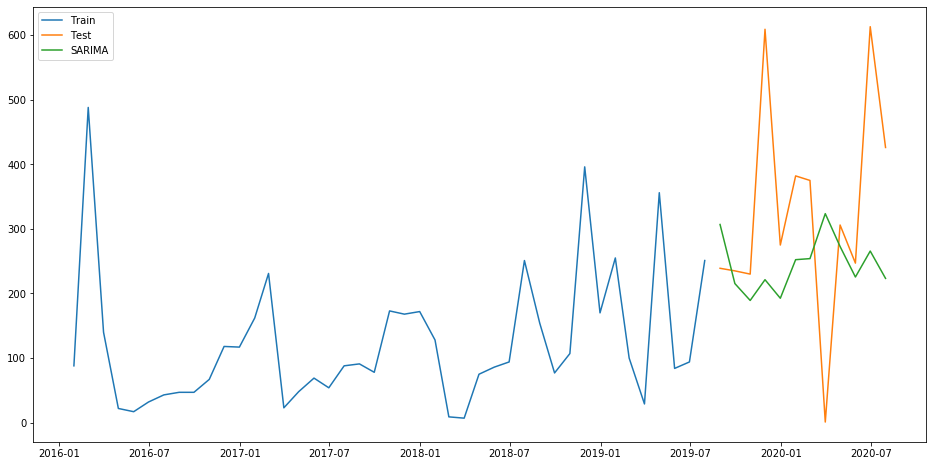

In [38]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2019-8-1", end="2021-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [39]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print(rms)

196.32338865343033


In [40]:
y_hat_avg['SARIMA']

Datetime
2019-08-31    306.803593
2019-09-30    215.342419
2019-10-31    189.215271
2019-11-30    221.333664
2019-12-31    192.602830
2020-01-31    252.325930
2020-02-29    253.967674
2020-03-31    323.571453
2020-04-30    272.694688
2020-05-31    225.483168
2020-06-30    265.668277
2020-07-31    223.355539
Freq: M, Name: SARIMA, dtype: float64

In [41]:
y_end_avg = end.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_end_avg['SARIMA'] = fit1.predict(start="2020-8-1", end="2021-12-31", dynamic=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [42]:
y_end_avg['SARIMA']

Datetime
2020-08-31    289.072373
2020-09-30    281.904491
2020-10-31    355.864336
2020-11-30    299.237802
2020-12-31    255.142543
2021-01-31    291.554202
2021-02-28    251.444969
2021-03-31    314.673336
Freq: M, Name: SARIMA, dtype: float64